In [17]:
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 5.2 MB/s eta 0:00:00
     ------------------------------------- 439.2/439.2 kB 13.8 MB/s eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 14.1 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 14.7 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 12.3 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 1.7/1.7 MB 12.0 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 17.0 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 1.5/1.5 MB 11.8 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ------------------------------------- 177.8/177.8 kB 11.2 MB/s eta 0:00:00
  Using cached tensorboard_

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
X_train.shape

(8000, 11)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [70]:
model = Sequential()

model.add(Dense(units=10,activation='linear',input_dim=11))
model.add(Dense(units=8,activation='linear'))
model.add(Dense(units=4,activation='linear'))
model.add(Dense(units=1,activation='sigmoid'))

In [71]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                120       
                                                                 
 dense_19 (Dense)            (None, 8)                 88        
                                                                 
 dense_20 (Dense)            (None, 4)                 36        
                                                                 
 dense_21 (Dense)            (None, 1)                 5         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
#history = model.fit(X_train_trf,y_train,epochs=5,verbose=1)
history = model.fit(X_train_trf,y_train,batch_size=128,epochs=10,verbose=1,
                    validation_data=(X_test_trf,y_test))

Epoch 1/10
63/63 [==============================] - 1s 5ms/step - loss: 0.6135 - accuracy: 0.6920 - val_loss: 0.5318 - val_accuracy: 0.7460
Epoch 2/10
63/63 [==============================] - 0s 3ms/step - loss: 0.4823 - accuracy: 0.7905 - val_loss: 0.4739 - val_accuracy: 0.7985
Epoch 3/10
63/63 [==============================] - 0s 3ms/step - loss: 0.4537 - accuracy: 0.8055 - val_loss: 0.4560 - val_accuracy: 0.8040
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8085 - val_loss: 0.4482 - val_accuracy: 0.8085
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.8087 - val_loss: 0.4438 - val_accuracy: 0.8115
Epoch 6/10
63/63 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.8102 - val_loss: 0.4408 - val_accuracy: 0.8100
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.8098 - val_loss: 0.4385 - val_accuracy: 0.8135
Epoch 8/10
63/63 [==

In [74]:
y_pred = model.predict(X_test_trf)

63/63 [==============================] - 0s 1ms/step


In [75]:
y_pred

array([[0.24750943],
       [0.33464167],
       [0.16713801],
       ...,
       [0.16753745],
       [0.14314903],
       [0.2425655 ]], dtype=float32)

In [76]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 6792.0459 - accuracy: 0.2025


[6792.0458984375, 0.20250000059604645]

In [77]:
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(y_pred)]

In [78]:
prediction_classes

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [79]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction_classes))

0.8085


In [80]:
history.history

{'loss': [0.613452136516571,
  0.4822656214237213,
  0.45370933413505554,
  0.4443601369857788,
  0.4401579201221466,
  0.4375678300857544,
  0.43581122159957886,
  0.4344152808189392,
  0.4333403706550598,
  0.4324442446231842],
 'accuracy': [0.6919999718666077,
  0.7904999852180481,
  0.8054999709129333,
  0.8084999918937683,
  0.8087499737739563,
  0.8102499842643738,
  0.8097500205039978,
  0.8105000257492065,
  0.8088750243186951,
  0.8098750114440918],
 'val_loss': [0.5317671895027161,
  0.47387468814849854,
  0.45595455169677734,
  0.4481714963912964,
  0.4438360929489136,
  0.4407508075237274,
  0.4385010898113251,
  0.43668264150619507,
  0.4351237714290619,
  0.43386223912239075],
 'val_accuracy': [0.7459999918937683,
  0.7985000014305115,
  0.8040000200271606,
  0.8084999918937683,
  0.8115000128746033,
  0.8100000023841858,
  0.8134999871253967,
  0.8105000257492065,
  0.8100000023841858,
  0.8084999918937683]}

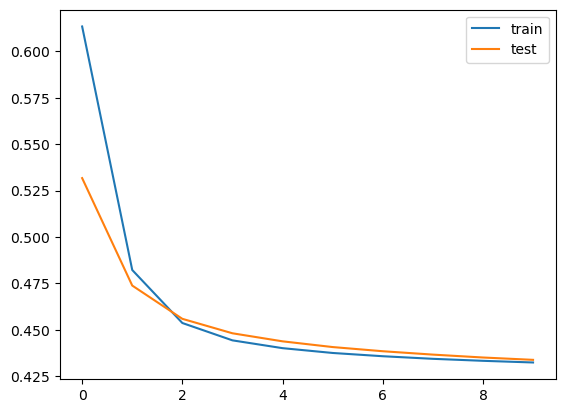

In [81]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

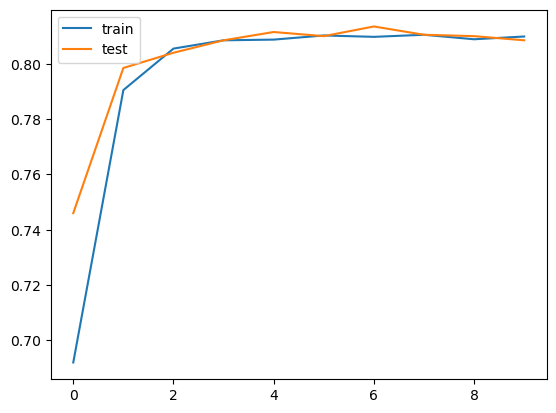

In [82]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

In [83]:
tensorflow.__version__

'2.11.0'